# Demand Estimation Exercise

In this assignment, you will learn how to simulate market data and estimate simple random coefficient demand models. The assignment should serve as an introduction to the structural estimation in heterogenous product demand models.

Let's first define the model.

    -> The idea is to provide an intuitive example of how it is possible to use
    Monte Carlo simulation.

-> might be better that they 
        # generate in module rather than as function attribute if they do not need to write t
        # themselves the code 

### Step 1: Simulate Data



In [1]:
import market
import numpy as np 
import pandas as pd 
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt
import pyblp

The first step is to initialize the model class

To do this you need to import the "simulation" module that was especially constructed for this course. Make sure the assignment notebook and the simulate are in the same folder if you have not prespecified a different path for the module.  (FIND A WAY FOR THE STUDENTS TO NOT RUN IT LOCAL, BUT ON THE GIT SERVER SUCH THAT THEY DO NOT NEED TO HAVE ANYTHING INSTALLED)

Lets start by setting the parameters defining the market. These include the number of firms `n_firms`, number of consumers `n_cons`, number of product charactistics `n_char` and the number of time periods (or separated markets) `T`.

In [2]:
# Set the number of firms and consumers, the number of characteristics and the
# number of time steps.
n_firms = 10
n_cons = 1000
n_char = 4
T = 100

# Initialize the market object
market_object = market.MarketData(n_firms, n_cons, n_char, T)

We have now created an _object_, which contains all the data and functions used to generate the data. The `market.py` file contains the Python code used to define this object. The simulation code makes use of the Object-Oriented Programming (OOP) paradigm. You do not need to change this code, but you can give it a look and try to understand the simulation process. 

We can now print the object, which will give us a summary of the main parameters of our simulation:

In [3]:
print(market_object)

Market with 10 firms and 1000 consumers over 100 time periods. 
 Firms sell differentiated product which have 4 product characteristics


Apart from the parameters we defined before, we need a set of structural parameters. We characterize the market by the following parameters:

$$
\begin{align*}
    \alpha_{\mu} &= 0.5 \\ \alpha_{\sigma} &=  0.05
\end{align*}
$$

These two parameters can be used for the lognormal distribution to find a $-1.65$ mean of the lognormal with standard deviation

$\beta_{\mu} =  [[1.47435481], [1.41511067] , [1.0707528 ], [2.39841642]]$ 

$\beta_{\sigma} = [[0.02938696], [0.02612406],  [0.00292152],  [0.01330291]]$


However, these are unknown to the econometrician.

THIS LOOKS LIKE SHIT



In [4]:
print(market_object.beta_0)
print(market_object.beta_sd)
print(market_object.alpha_0)
print(market_object.alpha_0_sd)

[[2.43371435]
 [1.36983501]
 [2.20479267]
 [0.30766116]]
[[0.01127675]
 [0.03599258]
 [0.00561194]
 [0.00134334]]
-1.650783460888857
0.006821238081735126


In [5]:
df = market_object.generate_simulated_data()
print(df)

     market_ids  firm_ids        shares    prices      cost        xi  \
0             1         1  3.431783e-01  4.905888  3.262528 -0.042173   
1             1         2  4.671654e-01  4.561659  3.331514 -0.135383   
2             1         3  1.537178e-01  5.601977  3.358621  0.027024   
3             1         4  6.686328e-03  4.626180  3.311746 -0.032851   
4             1         5  3.874043e-04  6.069318  3.352858  0.219944   
..          ...       ...           ...       ...       ...       ...   
995         100         6  9.372941e-06  4.182855  3.295705 -0.192426   
996         100         7  7.023095e-05  6.290395  3.364446  0.177320   
997         100         8  2.703375e-10  6.224980  3.351038  0.253008   
998         100         9  1.324568e-04  7.530053  3.327199  0.394304   
999         100        10  7.131708e-01  3.515811  3.364513 -0.438902   

        char1     char2     char3     char4  
0    4.084113  3.486695  5.444982  4.720201  
1    5.950637  4.411340  3.1000

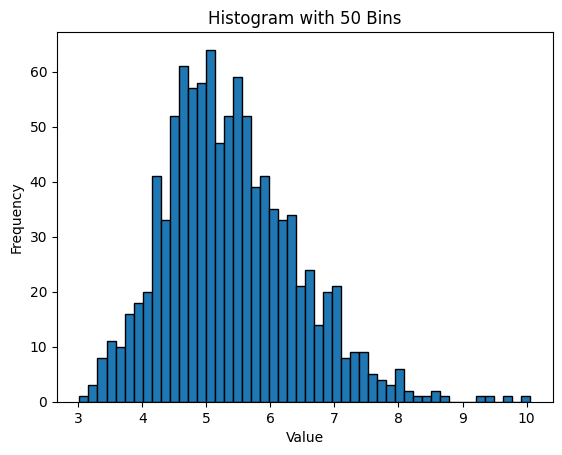

In [6]:
# try the standard probit model for finding the coefficients 
# Generate some random data for the histogram


# Create a histogram with 10 bins
plt.hist(market_object.prices, bins=50, edgecolor='black')

# Set labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram with 50 Bins')

# Display the plot
plt.show()

Trying to estimate with the logit function: 
 
y = ln(s_0) - ln(s_n)


In [7]:
reshape = np.reshape(market_object.market_shares, (T, n_firms))
sum_market_shares = np.sum(reshape, axis=1)
repeated_sum_shares = np.reshape(np.repeat(sum_market_shares, n_firms), (n_firms*T, 1))
y  = np.log(market_object.market_shares) - np.log(repeated_sum_shares)
print(y)
    

[[ -1.06950515]
 [ -0.76107195]
 [ -1.87263713]
 [ -5.00769046]
 [ -7.85604179]
 [-10.43858132]
 [ -8.61314768]
 [-18.16217529]
 [ -6.30063274]
 [ -3.61865584]
 [ -1.99039194]
 [ -1.17236083]
 [ -4.47806052]
 [ -4.87074187]
 [ -6.16916707]
 [-16.61456552]
 [ -5.56550902]
 [-19.6557604 ]
 [ -3.72130581]
 [ -0.68403492]
 [ -3.39210161]
 [ -1.30696983]
 [ -1.47110241]
 [ -4.86070606]
 [ -8.77621685]
 [-10.46894721]
 [ -8.10389489]
 [-18.91893515]
 [ -3.43589584]
 [ -0.85419815]
 [ -2.2400732 ]
 [ -1.77355278]
 [ -2.27840983]
 [ -6.0669217 ]
 [ -5.07129636]
 [-13.15856799]
 [ -7.2985847 ]
 [-21.28565748]
 [ -4.95007507]
 [ -0.50249457]
 [ -2.63778197]
 [ -1.08084394]
 [ -0.5492164 ]
 [ -8.93914014]
 [ -8.70258711]
 [-11.02142738]
 [ -6.77887722]
 [-21.65242859]
 [ -6.24579685]
 [ -4.78198549]
 [ -1.92304293]
 [ -2.32745162]
 [ -0.86526356]
 [ -8.98325406]
 [ -8.10475863]
 [-10.35535369]
 [ -6.35292262]
 [-21.74240493]
 [ -3.16127778]
 [ -1.23518405]
 [ -1.95756883]
 [ -0.59414686]
 [ -3.92

In [8]:
x = df[['prices','char1', 'char2', 'char3', 'char4', 'xi']]
y = y
 
# with sklearn
mod = sm.OLS(y, x).fit()
print(mod.summary())

# print('Intercept: \n', regr.intercept_)
# print('Coefficients: \n', regr.coef_)

# This already looks very good! Even without making in the IV 

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.974
Model:                            OLS   Adj. R-squared (uncentered):              0.974
Method:                 Least Squares   F-statistic:                              6199.
Date:                Mon, 23 Oct 2023   Prob (F-statistic):                        0.00
Time:                        19:52:57   Log-Likelihood:                         -1762.7
No. Observations:                1000   AIC:                                      3537.
Df Residuals:                     994   BIC:                                      3567.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/var/folders/v2/756s2x392yg86b682tz_zrl80000gn/T/ipykernel_76913/1315416700.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mu = mod.params[i+1]
/var/folders/v2/756s2x392yg86b682tz_zrl80000gn/T/ipykernel_76913/1315416700.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sigma = mod.bse[i+1]


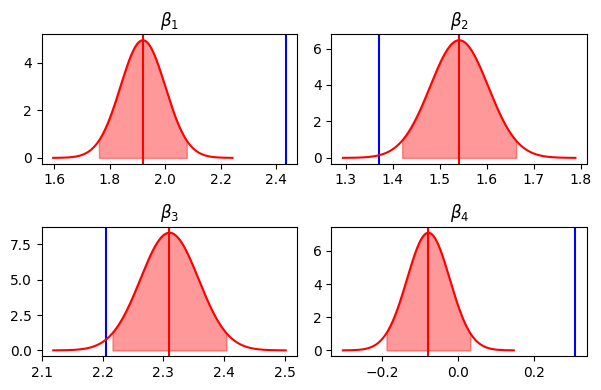

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(6, 4))

for i,ax in enumerate(axes.flatten()):
    ax.axvline(market_object.beta_0[i], label="true", color="blue")

    # Plot (distribution of) estimated coefficient
    mu = mod.params[i+1]
    sigma = mod.bse[i+1]
    x1 = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
    x2 = np.linspace(mu - 1.96*sigma, mu + 1.96*sigma, 1000)
    
    ax.axvline(mu, label="estimated", color="red")
    ax.plot(x1, stats.norm.pdf(x1, mu, sigma), color="red")
    ax.fill_between(x2, stats.norm.pdf(x2, mu, sigma), color="red", alpha=0.4)
    
    ax.set_title(f"$\\beta_{i+1}$")

plt.tight_layout()
plt.show()

In [10]:

print(market_object.beta_0)
print(market_object.beta_sd)
print(market_object.alpha_0)
print(market_object.alpha_0_sd)


[[2.43371435]
 [1.36983501]
 [2.20479267]
 [0.30766116]]
[[0.01127675]
 [0.03599258]
 [0.00561194]
 [0.00134334]]
-1.650783460888857
0.006821238081735126


Estimation with the PyBLP package (without supply side problem)


In [11]:
X1_formulation = pyblp.Formulation('0 + prices + char1 + char2 + char3 + char4')
X2_formulation = pyblp.Formulation('0 + prices')
product_formulations = (X1_formulation, X2_formulation)
product_formulations

(prices + char1 + char2 + char3 + char4, prices)

### Part 2: Exploring the Data

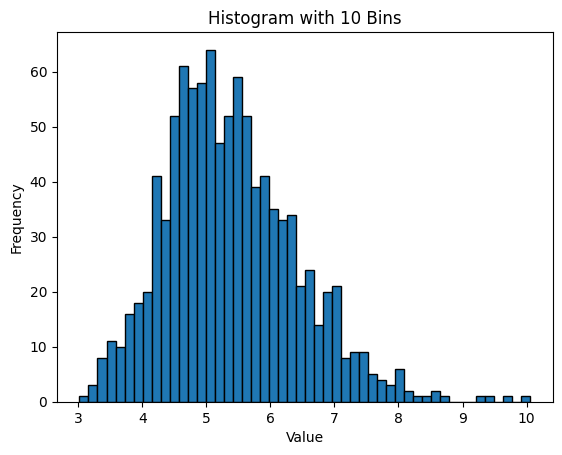

In [12]:
plt.hist(market_object.prices, bins=50, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram with 10 Bins')
plt.show()

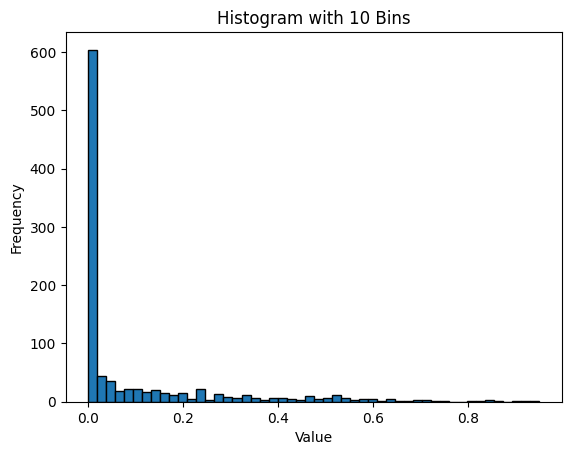

In [13]:
# Create a histogram with 10 bins
plt.hist(market_object.market_shares, bins=50, edgecolor='black')

# Set labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram with 10 Bins')

# Display the plot
plt.show()

### Part 3: Estimation

In [14]:
mc_integration = pyblp.Integration('monte_carlo', size=50, specification_options={'seed': 0})
mc_integration

Configured to construct nodes and weights with Monte Carlo simulation with options {seed: 0}.

In [15]:
mc_problem = pyblp.Problem(product_formulations, df, integration=mc_integration)


Initializing the problem ...
Initialized the problem after 00:00:00.

Dimensions:
 T    N     F    I     K1    K2    MD 
---  ----  ---  ----  ----  ----  ----
100  1000  10   5000   5     1     4  

Formulations:
       Column Indices:           0       1      2      3      4  
-----------------------------  ------  -----  -----  -----  -----
 X1: Linear Characteristics    prices  char1  char2  char3  char4
X2: Nonlinear Characteristics  prices                            


In [16]:
bfgs = pyblp.Optimization('bfgs', {'gtol': 1e-4})


In [17]:
# results1 = mc_problem.solve(sigma=np.ones((1, 1)), optimization=bfgs)



Estimation including costs (with the cost structure of the firm and pricing)


In [18]:
# product_data = df
# # Setting up the formulations
# product_formulations = (pyblp.Formulation('0 + prices + char1 + char2 + char3 + char4'), pyblp.Formulation('0 + prices'),pyblp.Formulation('cost'))

# mc_integration = pyblp.Integration('monte_carlo', size=100, specification_options={'seed': 0})
# problem = pyblp.Problem(product_formulations, product_data, integration=mc_integration)
# bfgs = pyblp.Optimization('bfgs', {'gtol': 1e-6})
# estimation = problem.solve(sigma=(np.ones((1, 1))/2),beta=[1., 1., 1., 1., 1.], optimization=bfgs)

## Final Results from all the techniques used

1. Simple logit model 
2. PyBLP RC with all elements as RC but no IV estimates 
3. PyBLP also with supply side moments 
